In [19]:
import os

# Paths to folders containing images
cancer_folder_path = r"D:\yedek\lavdie.rada\Pictures\kancer"
non_cancer_folder_path = r"D:\yedek\lavdie.rada\Pictures\non cancer"

# Function to check if the folder exists and is accessible
def check_folder_access(folder_path):
    if os.path.exists(folder_path):
        if os.access(folder_path, os.R_OK):
            print(f"Access granted to: {folder_path}")
        else:
            print(f"Permission denied to access: {folder_path}")
    else:
        print(f"Folder does not exist: {folder_path}")

# Check access for both folders
check_folder_access(cancer_folder_path)
check_folder_access(non_cancer_folder_path)


Access granted to: D:\yedek\lavdie.rada\Pictures\kancer
Access granted to: D:\yedek\lavdie.rada\Pictures\non cancer


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Paths to folders containing images
cancer_folder_path = r"D:\yedek\lavdie.rada\Pictures\kancer"
non_cancer_folder_path = r"D:\yedek\lavdie.rada\Pictures\non cancer"

# Image dimensions
IMG_HEIGHT = 128
IMG_WIDTH = 128

# Load images and labels from subfolders
def load_images_from_subfolders(folder_path, label):
    images = []
    labels = []
    
    # Walk through all subfolders in the folder
    for root, dirs, files in os.walk(folder_path):  # This will walk through all subfolders
        for filename in files:
            file_path = os.path.join(root, filename)
            
            # Print the path for debugging
            print(f"Processing: {file_path} (is directory: {os.path.isdir(file_path)})")
            
            # Check if the file is an image (you can add more formats if needed)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                try:
                    # Load and resize the image
                    img = tf.keras.preprocessing.image.load_img(file_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    images.append(img_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Failed to process {file_path}: {e}")
            else:
                print(f"Skipping non-image file: {filename}")
    return np.array(images), np.array(labels)

# Load cancer and non-cancer images
cancer_images, cancer_labels = load_images_from_subfolders(cancer_folder_path, label=1)  # 1 for cancer
non_cancer_images, non_cancer_labels = load_images_from_subfolders(non_cancer_folder_path, label=0)  # 0 for non-cancer

# Combine datasets
X = np.concatenate((cancer_images, non_cancer_images), axis=0)
y = np.concatenate((cancer_labels, non_cancer_labels), axis=0)

# Normalize pixel values to [0, 1]
X = X / 255.0

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
# model.save('cancer_classifier_model.h5')


Processing: D:\yedek\lavdie.rada\Pictures\kancer\Cancer\1\FILE0004.jpg (is directory: False)
Processing: D:\yedek\lavdie.rada\Pictures\kancer\Cancer\1\FILE0005.jpg (is directory: False)
Processing: D:\yedek\lavdie.rada\Pictures\kancer\Cancer\1\FILE0006.jpg (is directory: False)
Processing: D:\yedek\lavdie.rada\Pictures\kancer\Cancer\1\FILE0007.jpg (is directory: False)
Processing: D:\yedek\lavdie.rada\Pictures\kancer\Cancer\10\FILE0004.jpg (is directory: False)
Processing: D:\yedek\lavdie.rada\Pictures\kancer\Cancer\10\FILE0005.jpg (is directory: False)
Processing: D:\yedek\lavdie.rada\Pictures\kancer\Cancer\10\FILE0006.jpg (is directory: False)
Processing: D:\yedek\lavdie.rada\Pictures\kancer\Cancer\10\FILE0007.jpg (is directory: False)
Processing: D:\yedek\lavdie.rada\Pictures\kancer\Cancer\100\FILE0000.jpg (is directory: False)
Processing: D:\yedek\lavdie.rada\Pictures\kancer\Cancer\100\FILE0001.jpg (is directory: False)
Processing: D:\yedek\lavdie.rada\Pictures\kancer\Cancer\100\FI

In [30]:
model.save('cancer_classifier_model.h5')

In [32]:
# Save the model in the recommended format
model.save('cancer_classifier_model.keras')


136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9966 - loss: 0.0154
Validation Loss: 0.02385714091360569
Validation Accuracy: 0.9949238300323486


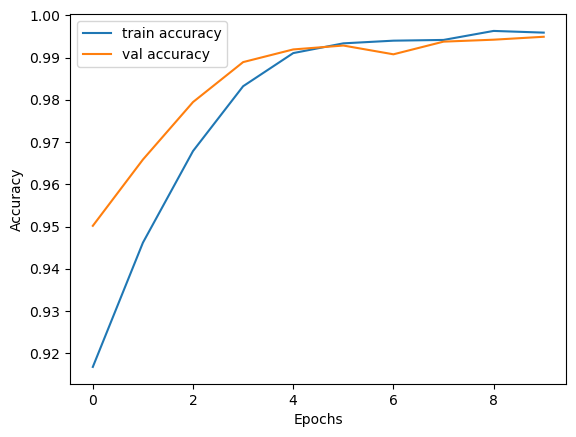

In [34]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()